<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-основных-параметров:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Анализ-основных-параметров:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ основных параметров: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span></li><li><span><a href="#Определение-10-населенных-пунктов-с-наибольшим-количеством-объявлений" data-toc-modified-id="Определение-10-населенных-пунктов-с-наибольшим-количеством-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение 10 населенных пунктов с наибольшим количеством объявлений</a></span></li><li><span><a href="#Изучение-предложения-квартир-в-Санкт-Петербурге" data-toc-modified-id="Изучение-предложения-квартир-в-Санкт-Петербурге-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение предложения квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Анализ-квартир-в-центре" data-toc-modified-id="Анализ-квартир-в-центре-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [165]:
import pandas as pd # импортируем библиотек pandas

In [166]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.') # чтение файла

In [167]:
display(df.head(5)) # просмотр первых 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим общую информацию о файле:

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 22 столбца. Тип данных в двух столбцах -bool, 14 столбцов -float64, 3 столбца -int64, и три -object.

Предварительно можно сказать, что у некоторых столбцов с данными лучше изменить тип, для улучшения восприятия. Мы заменим тип float64 на int64 в следующих столбцах:  количество этажей (floors_total), количество балконов (balcony), количество парков (parks_around3000), количество водоемов (ponds_around3000), количество дней размещения объявления (days_exposition). Все эти данные характеризуют целые величины, поэтому приведем их к целому числу.

В данных есть пропуски и чтобы не считать их вручную, посчитаем их методом isna().sum(), а также посмотрим долю пропущенных значений, чтобы понимать, можем мы этими данными пожертвовать при дальнейшей обработки или нет.

In [169]:
df.isna().sum() # подсчет пропусков в столбцах


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [170]:
df.isna().mean() # проверка доли пропусков от общего количества данных по столбцам

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Достаточно большое количество данных пропущено и придется разбираться, что можно удалить, что заменить, а что трогать не будем.

Дополнительно можно запустить проверку методом describe(). На данном этапе мне интересны максимальные и минимальные значения, для того чтобы понимать нужно ли будет избавляться только от пропусков или еще придется работать с нулями. Также получившаяся таблица пригодится, когда нужно будет строить срезы, и отсеивать выбросы.

In [171]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Как и ожидалось, в данных есть "странные" минимумы, например количество комнат равное нулю, или высота потолков равная 1 метру. Далее посмотрим насколько эти данные искажают общую картину и нужно ли их отсеять.

**Вывод**

Мы получили первое представление о данных:
- там есть пропуски, часть которых нужно будет заменить на значения, а часть оставить без изменения
- у определенной части данных, нужно будет изменить тип с вещественного на целочисленный
- в таблице есть столбец с наименованием населенного пункта, поэтому лучше проверить его на наличие дубликатов и исправить их
- проверить всю таблицу на наличие полностью дублирующихся строк и удалить их


## Предобработка данных

### Работа с пропусками

В таблице много пропущенных данных. Попробуем с ними разобраться.

Начнем с самых больших значений - это столбцы расстояние до ближайшего парка(parks_nearest), Расстояние до ближайшего водоема (ponds_nearest ), количество балконов (balcony), апартаменты (is_apartment)

Вероятнее всего, если в графе с количеством балконов стоит пропуск, то балкона нет. Заменим пропуски на ноль с помощью метода fillna()

In [172]:
df['balcony'] = df['balcony'].fillna(0) # замена NaN на 0

Поскольку данные о расстоянии до ближайшего парка и водоема получены автоматически  на основе картографических данных, то пропуски скорее всего говорят об отсутствии водоемов и парков в округе. Хотя возможна и ошибка, не очень понятно какое расстояние бралось в расчет при автоматическом сборе данных. Учитывая, что продаваемые квартиры, расположены  в Санкт-петербурге и по всей Ленинградской области, можно с уверенностью сказать, что заменять на медиану или среднее арифметическое в данном случае не корректно, ведь выборка очень разнообразная. Также заменять пропуски на ноль не стоит, иначе получится, что водоем и парк прямо при выходе из квартиры. 

Аналогичная ситуация с расстоянием до аэропорта и центра города, данные о которых тоже получены автоматически. Тут даже в пределах одного Санкт-Петербурга, без конкретного адреса сложно сказать какое расстояние будет до указанных пунктов.

Итак данные по расстоянию до аэропорта, центра города, ближайшего парка и водоема оставляем без изменений.

А вот пропуски в столбцах с количеством парков и водоемов в радиусе 3 км, мы заменим на 0. Вероятнее всего, что их просто нет. Для замены опять используем метод fillna()

In [173]:
df['parks_around3000'] = df['parks_around3000'].fillna(0) # замена NaN на 0


In [174]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0) # замена NaN на 0

Столбик с данными отражающими вид жилья - аппартаменты, имеет булев тип. Т.е. данные в этом стоблике могут быть либо True, либо False. Как мне кажется, в Санкт_петербурге, пока не очень распространен данный вид жилья, а тем более в далеких деревнях Ленинградской области. Хотя несколько апарт-отелей  в Питере видела, но это больше исключение, чем правило. Если у нас нет консультанта по недвижимости, вороятнее всего, что пропуск в данном столбце, говорит о том, что продается обычная квартира и соответственно пропуск мы заменим на False


In [175]:
df['is_apartment'] = df['is_apartment'].fillna(False) # замена NaN на False

Удалим из выборки строки, в которых не указан населенный пункт (0,2% от выборки) . Без указания населенного пункта все остальные сведенья о квартире достаточно бесполезны.

In [176]:
df.dropna(subset = ['locality_name'], how='all', inplace = True) # удаление строки с пропущенными значениями

Пропуски в в количестве этажей в доме заменим на этаж квартиры.

In [177]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

Теперь разберемся с высотой потолков. Сегодня минимальной нормой в России считается высота потолка 2,4 метра (для Санкт-Петербурга 2,5 м). В новостройках, обычно, это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. 

Мы не знаем класс продаваемых квартир, поэтому расчитаем медианы отдельно для Санкт-Петербурга и отдельно для всех других населенных пунктов.Разделить на эти две группы, я читаю целесообразным по нескольким причинам:
- в последние годы в Санкт-Петербурге строится очень много новых домов, как не очень дорогих, классических эконом класса, где высота потолков примерно одинаковая от 2,5 м до 2,7 м, так и элитного жилья и даже двухэтажных квартир. Плюс не будем забывать про вторичное жилье-дома построенные в позднесоветское время, где высота потолков 2,5 м или наоборот старые дома (особенно дореволюционные), где потолки 3-3,5 м. Но основная масса квартир все же с потолками в диапазоне 2,5-2,7 м
- многие (но не все) прочие населенные пунктя, я так или иначе знаю. Большинство из них представляют собой небольшие населенные пункты с невысокой плотностью населения и стандартными панельными домами (в основном пяти этажные, хотя есть и девятиэтажки) построенные по принципу "пусть маленькое жилье, но свое". Потолки в таких домах не отличаются высотой. Есть конечно, ряд населенных пунктов с элитным жильем, но их не много.
- я бы еще выделила группу, в которую включила бы мелкие города в окресностях Питера, такие как Пушкин, Павловск, Ломоносов, Петергоф, Всеволожск и подобные, но тут я боюсь ошибиться, потому, что часть из них по своим характеристикам ближе к Питеру, а часть к прочим населенным пунктам. Жилищный фонд там в основном представлен старыми домами, но эконом класса, кроме исторических центров этих городов. Но опять повторюсь, с этими пунктами боюсь ошибится и лучше присоединю их к группе "другие"


In [178]:
ceiling_height_spb_median = df['ceiling_height'].loc[df['locality_name'] == 'Санкт-Петербург'].sort_values().median() #применение логической индексации и расчет медианы
display(ceiling_height_spb_median)

2.7

In [179]:
ceiling_height_others_median = df['ceiling_height'].loc[df['locality_name'] != 'Санкт-Петербург'].sort_values().median()
display(ceiling_height_others_median)

2.6

Медианы отличаются не на много, но все же отличаются. Произведем замену пропущенных значений на соответствующую медиану методом fillna(), но вместо числа, заменим на переменную.

In [180]:
df['ceiling_height'] = df['ceiling_height'].loc[df['locality_name'] == 'Санкт-Петербург'].fillna(ceiling_height_spb_median)


In [181]:
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_others_median) # замена NaN на значение переменной

In [182]:
display(df.head(10)) #посмотрим на первые 10 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


У нас остался еще столбик с временим размещения объявлений от момента создания до снятия, в котором остались пропуски. Пропуски, вероятнее всего, связаны с тем, что на момент создания таблицы объявления были еще активны (не сняты с публикации). Предсказать, когда они будут сняты с продажи, очень сложно, т.к. возможно есть не известные нам факты, а может прошло слишком мало времени с момента размещения. Тут нужно смотреть по каждой позиции отдельно, но это уже работа риэлтора, давать рекомендации продавцам, по тому как быстрее продать.

Наша задача оценить время размещения объявлений по уже закрытим объявлениям. Поэтому, оставим пропуски в столбце, не смотря на то, что это 13% от выборки. Если я почувствую, что данных не хватает или пропуски сильно искажают картину, то я всегда могу вернутся к этому пункту и подумать, есть ли какое-то другое решение этой проблемы.

Заменим пропуски в графе с площадью кухни. В случае? если у квартиры не указана жилая площадь и площадь кухни поставим вместо пропусков 6 кв.м, а в остальных случаях поставим примерную площадь, равную разности общей площади и жилой.

In [183]:
a = df['total_area'] - df['living_area']
b = 6
for i in df['kitchen_area']:
    if [df['living_area'] >0]:
        df = df.fillna({'kitchen_area': a})
    if [df['living_area'] == df['living_area']]:
        df = df.fillna({'kitchen_area': b})

Теперь заменим NaN в столбце с указанием жилой площади.

In [184]:
c = df['total_area'] - df['kitchen_area']
for i in df['living_area']:
    if [df['living_area'] == df['living_area']]:
        df = df.fillna({'living_area': c})
   

In [185]:
df.isna().sum() # посмотрим количество пропусков.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Итак пропуски остались, только в тех столбцах, где мы их решили оставить.


### Замена типа данных

Как уже написано ранее, произведем замену типов данных в определенных столбцах.

In [186]:
df.astype({'floors_total': 'int', 'balcony': 'int', 'last_price': 'int'})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.60,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.70,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.70,14,153.00,9,False,...,6.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.60,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.60,3,29.70,1,False,...,27.00,0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17,53.45,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Обработка дубликатов

Проверим нашу таблицу на наличие полностью дублирующихся строк методом duplicated().sum()

In [187]:
df.duplicated().sum() #проверка наличия и подсчет дублирующихся строк

0

In [188]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Как и ожидалось, здеть дубликаты есть, причем не явные. Напишем функцию для их замены.

In [189]:
def replase_locality_name(wrong_names, correct_name):
    for wrong_name in wrong_names:
        df['locality_name'] = df['locality_name'].replace(wrong_name, correct_name, regex=True)
                                 
duplicates = ['посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской поселок']
locality_name = 'поселок'
replase_locality_name(duplicates, locality_name)

Все поселки мы привели к единому формату.

Среди дупликатов еще встречается несколько вариантов написания поселка Мурино. Поскольку он второй после Санкт-Петербурга по повторяемости, то объединим все названия в одно. Для этого напишем еще одну функцию

In [190]:
def replase_locality_name(wrong_names, correct_name):
    for wrong_name in wrong_names:
        df['locality_name'] = df['locality_name'].replace(wrong_name, correct_name)
                                 
duplicates = ['Мурино']
locality_name = 'поселок Мурино'
replase_locality_name(duplicates, locality_name)

In [191]:
df['locality_name'].sort_values().unique() #проверим уникальные значения в столбце

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'деревня Агалатово',
       'деревня Аро', 'деревня Батово', 'деревня Бегуницы',
       'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка', 'деревн

Дубликаты успешно исправлены. 


**Вывод**

В этои разделе мы постарались исправить ошибки и неточности в данных.
- заменили пропуски, где сочли это уместным
- часть пропусков оставили без изменений, с пояснением, почему мы это сделали.
- изменили тип данных, и теперь они должны лучше восприниматься при чтении таблицы
- удалили дубликаты

## Расчёты и добавление результатов в таблицу

Для решения поставленных задач, нам понадобятся дополнительные столбики с данными.

Расчитаем цену квадратного метра для каждой стороки:

In [192]:
df['unin_price'] = round(df['last_price'] / df['total_area']) # расчет цены за кв.м и округление значения до целого значения


Внесем три дополнительных столбца соотвeтствующих году, месяцу и дню недели даты публикации объявления:

In [193]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M') # изменяем формат даты
df['year'] = df['first_day_exposition'].dt.year # создания столбика с годом размещения объявления
df['month'] = df['first_day_exposition'].dt.month # создания столбика с месяцем размещения объявления
df['weekday'] = df['first_day_exposition'].dt.weekday # создания столбика с днем недели размещения объявления
display(df.head()) #проверим первые 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,unin_price,year,month,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,153.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,2018,6,1


Отнесем этаж квартиры к определенной группе: первый, последний и другое:

Для этого напишем функцию:

In [194]:
def floor_group(row):
    floor=row['floor']
    floors_total=row['floors_total']
    
    
    if floor == 1:  
        return 'первый'
    
    elif floor == floors_total: 
        return 'последний'
    else:
        return 'другой'
    
df['floor_group'] = df.apply(floor_group, axis=1)
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,unin_price,year,month,weekday,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.0,2019,3,3,другой
1,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82921.0,2018,12,1,первый
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92786.0,2015,8,3,другой
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,153.00,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.0,2015,7,4,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,2018,6,1,другой
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,False,...,0.0,NaN,0.0,NaN,55.0,95066.0,2018,9,0,другой
6,6,3700000.0,37.30,2017-11-02,1,2.60,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99196.0,2017,11,3,другой
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,52.70,22,False,...,0.0,NaN,0.0,NaN,NaN,110545.0,2019,4,3,другой
8,20,2900000.0,33.16,2018-05-23,1,2.60,27.0,15.43,26,False,...,0.0,NaN,0.0,NaN,189.0,87455.0,2018,5,2,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88525.0,2017,2,6,другой


Этажи помечены. Для проверки вывели 20 строк, чтобы точно убедится, что все три варианта встали на свои места.

Последнее, что мы сделаем - это посчитаем соотношение жилой площади к общей, а также отношение площади кухни к общей.

In [195]:
df['ratio_living_total_area'] = df['living_area'] / df['total_area'] # расчет отношения жилой площади к общей
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area'] # расчет отношения площади кухни к общей
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,unin_price,year,month,weekday,floor_group,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.0,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,153.0,9,False,...,3.0,234.0,424.0,408176.0,2015,7,4,другой,0.962264,0.037736
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,2018,6,1,другой,0.320000,0.410000


Дополнительные столбики добавлены в таблицу. Переходим непосредственно к анализу данных.

## Исследовательский анализ данных

### Анализ основных параметров: площадь, цена, число комнат, высота потолков

Изучим основные параметры:площадь, цена, число комнат, высота потолков. И сделаем это с помощью построения гистограммы для каждого параметра.

Для начала импортируем библиотеку matplotlib, для работы с графиками. Для построения гистограмм используют метод hist()

In [196]:
import matplotlib.pyplot as plt # импорт библиотеки matplotlib

Площадь:

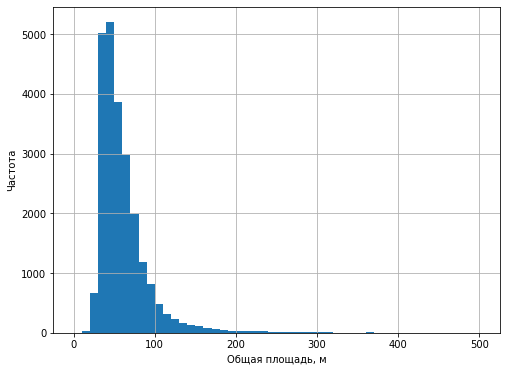

In [197]:
df['total_area'].hist(bins=50, range= (0, 500), figsize=(8, 6))
plt.xlabel('Общая площадь, м')
plt.ylabel('Частота')
plt.show()

Основная масса квартир с площадью до 100 кв.м. После 200 кв.м количество квартир стремится к нулю. Я бы сказала, что основная масса-это квартиры площадью 50 кв.м (+/- 10 кв.м). Далее после 100 кв. м количество сильно снижается.

Далее посмотрим цену:

Но для начала нужно определить какой диапазон значений задать на гистограмме, потому что сначала попробовав сделать гистограмму без указания интервала цен, я получила достаточно не читаемый график (большинство значений слились в один огромный столбик). Если указать в диапазоне значений цены максимальное значение, то тоже гистограмма плохо читается.

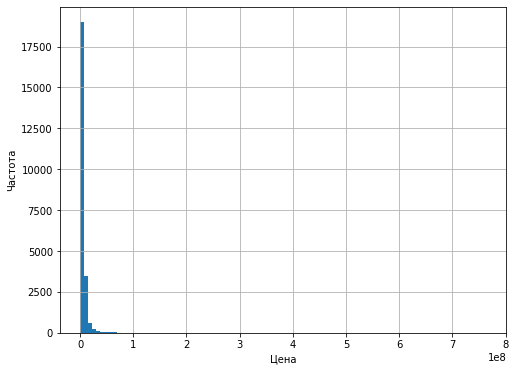

In [198]:
df['last_price'].hist(bins=100, range=(0, 763000000), figsize=(8, 6))
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Я посчитала, сколько квартир стоимостью более 100 000 000 есть в выборке:

In [199]:
display(len(df.loc[df['last_price'] > 100000000])) #использование метода len() для подсчета строк, возвращенных логической индексацией 

37

Всего 37 квартир стоимостью более ста миллионов. Думаю их можно исключить из диапазона при построении гистограммы по стоимости квартир, потому что нам нужно понять общую тенденцию, а эти 37 квартир больше похожи на выбросы из общей выборки.  

Строим еще раз гистограмму по стоимости квартир в диапазоне от нуля до ста миллионов:

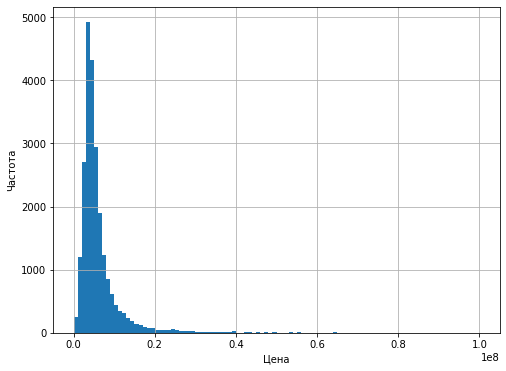

In [200]:
df['last_price'].hist(bins=100, range=(12000, 100000000), figsize=(8, 6))
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Теперь видно, что после отметки в 10 миллионов, количество квартир сильно уменьшилось, после 20 миллионов их остались не много. Основная часть приходится на диапазон цен от 2 до 6 миллионов. Есть значения в районе нуля (минимальная стоимость квартиры 12160).На квартиры стоимостью меньше миллиона стоит обратить внимание и проверить с чем могут быть связаны такие низкие цены (таких значений в выборке 225). Возможно, это срочная продажа и тогда цену снижают (хотя обычно снижение примерно 20% от цены), возможно низкая цена связана с местом размещения и площадью (маленькая площадь при сильной удаленности от большого города, плохая транспортная доступность могут приводить к тому, что цены будут сильно ниже среднерыночных). 

Количество комнат:

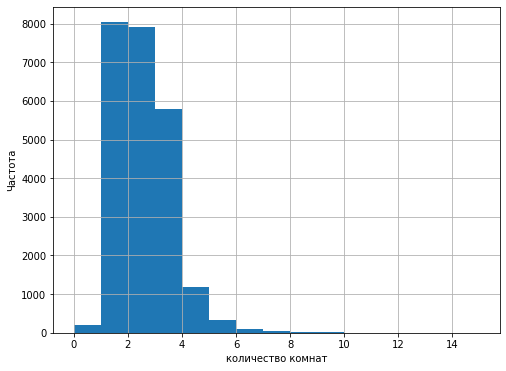

In [201]:
df['rooms'].hist(bins=15, range=(0,15), figsize=(8, 6))
plt.xlabel('количество комнат')
plt.ylabel('Частота')
plt.show()

Основная масса квартир с 1-2 комнатами (однокомнатных чуть больше). Трехкомнатных несколько меньше, но достаточно большое количество. Квартиры с четырьмя комнатами встречаются значительно реже. Квартиры с большим количеством комнат уже редкость и в районе 8 комнат значение близкое к нулю. При этом мы видим некоторое (не значительное) количество квартир в районе 0- действительно в данных встречались нули в графе с указанием количества комнат - в этом случае лучше уточнить у специалистов, которые предоставляли данные.

Высота потолков:

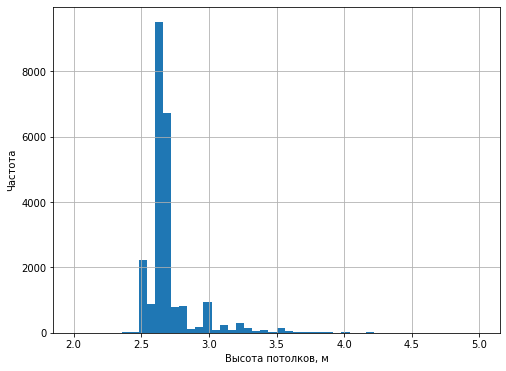

In [202]:
df['ceiling_height'].hist(bins=50, range=(2, 5), figsize=(8, 6))
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

Как и ожидалось основная масса квартир с потолками в диапазоне 2,5-2,8 м. Дальше идет небольшой провал, потому что высота 2,85-2,9 м не очень характерна (в основном застройшики придерживаются определенных стандартов). На уровне 3 м, опять небольшой всплеск, далее количество квартир с более высокими потолками не значительно.

### Изучение времени продажи квартиры

Далее посмотрим такой параметр, как время продажи квартиры. Для начала построим гистограмму:

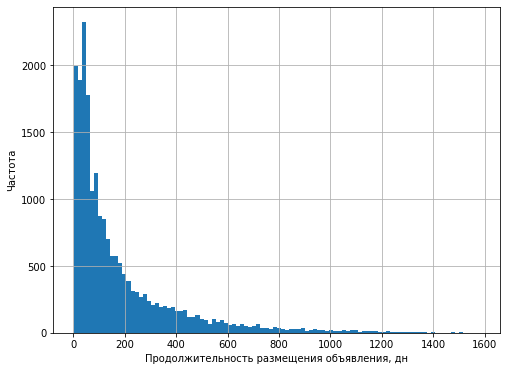

In [203]:
df['days_exposition'].hist(bins=100, figsize=(8, 6))
plt.xlabel('Продолжительность размещения объявления, дн')
plt.ylabel('Частота')
plt.show()

На гистограмме видны какие-то значения в районе нуля, пока не понятно, что это за значения, но их достаточно много. Возможно, эти строки относятся к "срочным" продажам, а возможно просто закрытие объявления без свершившегося факт продажи (просто передумали).

Основная масса закрытия объявлений за период с 20 дней, пик в районе 50 дней, а дальше идет постепенное снижение. Дольше 500 дней продержалось небольшое количество объявлений, а к 800 остались буквально единицы.

Посчитаем средне и медиану:


In [204]:
display(df['days_exposition'].mean()) # расчет среднего арифметического
display(df['days_exposition'].sort_values().median()) # расчет медианы

180.7531998045921

95.0

Медиана меньше среднего в два раза.

Посмотрим диаграмму размаха, чтобы легче было определится с границей очень быстрых и очень медленных продаж. Диаграмму размаха строят с помощью метода boxplot()

(0, 1600)

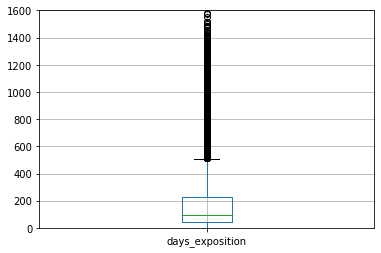

In [205]:
df.boxplot('days_exposition')
plt.ylim(0, 1600)


Мы получили границы нормального размаха, значения за пределами которого можно считать выбросами. Нижний "ус" упирается в минимальное значение, равное 1, а верхний в районе 500 (1,5 межквартильго размаха, добавленного к 3-му квартилю). Видно на сколько медиана далека от верхних значений.

Можно ту же информацию получить, не строя график (я например, лучше воспринимаю информацию в цифрах, а на не графиках). Для этого используем метод describe()

In [206]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Уточним, нормальный разброс у нас от 1 до 578.

Можно сказать, что продажи свыше 578 - это "долгие продажи". Сложнее определится с "очень быстрыми" продажами. Специалисты в области продажи квартир, сходятся во мнении, что минимальный срок продажи квартиры - это месяц. Можно продать квартиру и за значительно меньший срок, но это, как правили, идет с сильным снижением цены, так называемые "срочные продажи", когда цена уже не стоит на первом месте, на первое место выходит минимализация срока продажи.

Посмотрим количество объявлений со сроком размещения менее 30 дней.

In [207]:
display(len(df.loc[df['days_exposition']<=30])) # подсчет количества строк удовляетворяющим условию


3733

18% от выборки достаточно много, но нам нужно сделать такую выборку значений, в которой мы будем достаточно уверены и которая будет описывать общую тенденцию, без слишком быстрых и слишком медленных продаж. Методом query() сделаем срез данных без быстрых и медленных продаж и данные сохраним в переменную.

In [208]:
normal_sales_period = df.query('(days_exposition >= 30) & (days_exposition <= 578)')

Посмотрим как изменилась гистограмма при отсечении очень быстрах и очень медленных продаж.

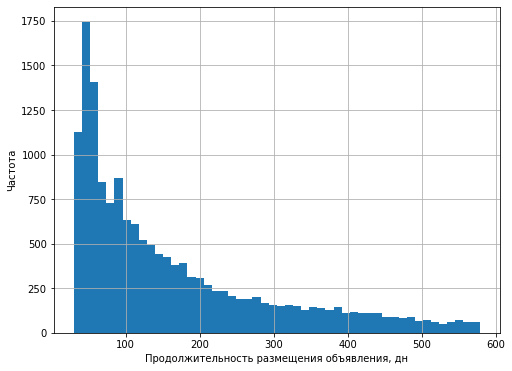

In [209]:
normal_sales_period['days_exposition'].hist(bins=50, figsize=(8, 6))
plt.xlabel('Продолжительность размещения объявления, дн')
plt.ylabel('Частота')
plt.show()

In [210]:
normal_sales_period['days_exposition'].describe()

count    15637.000000
mean       163.716314
std        132.504165
min         30.000000
25%         60.000000
50%        115.000000
75%        226.000000
max        578.000000
Name: days_exposition, dtype: float64

**Вывод** 

В этом пункте мы посмотрели как распределяется количество объявлений по времени их размещения. Отсекли слишком медленные продажи, на основании результата построения диаграммы размаха. Постарались отсечь быстрые продажи, на основании данных независимых экспертов (данные получены из интернета). На основании среза "нормальных" продаж еще раз посчитали медиану и среднее. Полученные результаты, считаю более близки к жизни, чем полученные из не обработанных данных.

### Факторы влияющие на стоимость квартиры

Посмотрим, какие факторы больше всего влияют на стоимость квартиры.

В первую очередь посмотрим насколько сильно зависит цена от площади квартиры. Для этого посчитаем  коэффициент корреляцию Пирсона методом corr(), а затем для наглядности построим диаграмму рассеивания методом plot(). 

In [211]:
df['last_price'].corr(df['total_area']) #расчет коэффициента корреляции

0.6537428966335397

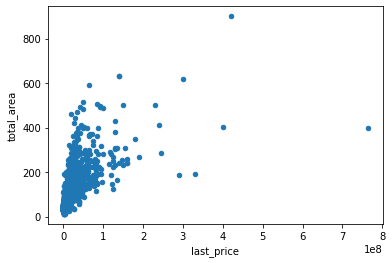

In [212]:
df.plot(x='last_price', y= 'total_area', kind = 'scatter') 
plt.show()

Коэффициент корреляции достаточно большой, но не равен единице. Да и на графике общая тенденция увеличения стоимоcти при увеличении площади просмотривается. Но есть выбивающиеся из общей картины значения.

Далее посмотрим взаимосвязь между ценой и количеством комнат. Опять посчитаем коээфициент корреляции Пирсона и построим диаграмму рассеивания

In [213]:
df['last_price'].corr(df['rooms']) #расчет коэффициента корреляции

0.36342062218770693

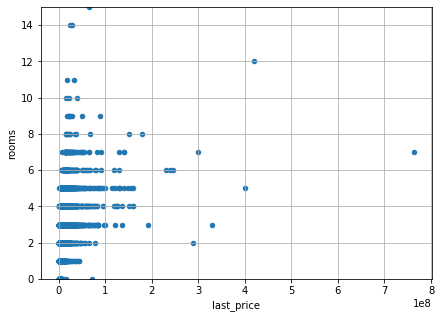

In [214]:
df.plot(x='last_price', y= 'rooms', kind = 'scatter', ylim=(0, 15), figsize=(7, 5), grid=True) 
plt.show()

Коэффициент корреляции достаточно низкий. По графику также видно, что разное количество комнат может быть за одни и те же деньги. Возможно, лучше рассматривать зависимость цены от площади и количества комнат вместе.

Аналогично предыдущим парам параметров, посмотрим на взаимосвязь цены и удаленности от центра.

In [215]:
df['last_price'].corr(df['cityCenters_nearest']) #расчет коэффициента корреляции

-0.20688702501498762

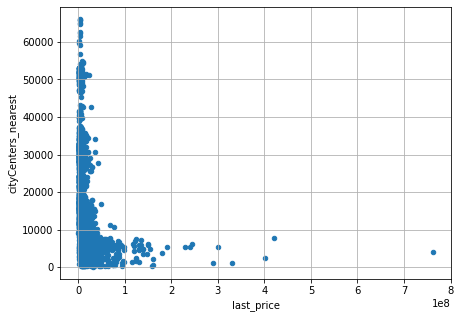

In [216]:
df.plot(x='last_price', y= 'cityCenters_nearest', kind = 'scatter', figsize=(7, 5), grid=True)
plt.show()

Здесь у нас ситуация, когда коэффициент корреляции отрицательный, т.е. при увеличении удаленности от центра, цена становится ниже. Но поскольку относительная величина коэффициента не велика, то можно сказать о достаточно слабой взаимосвязи между этими показателями.

Далее нужно определить влияет ли этаж на цену

Для этой задачи, чучше построить столбчатую диаграмму используя параметр kind='bar'

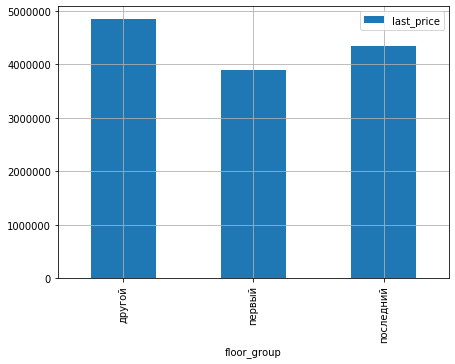

In [217]:
df.pivot_table(index= 'floor_group', values ='last_price', aggfunc='median').plot(kind='bar', figsize=(7, 5), grid=True)
plt.show()

Первый этаж самый дешевый, последний подороже, но лучше по цене этажи между ними. На практике, действительно так и есть, что первый этаж в доме самый дешевый, а с увеличением номера этажа цена растет.При этом последний, этаж в обычных домах тоже ценится ниже, чем идущий перед ним. Чаще всего это связано с теми особенностями, которые характерны для них: первый сырой и темный от близости земли и подвала, а на последнем возможны протечки с крыши (по крайней мере такое представление есть в головах людей).

Необходимо определить влияет ли дата размещения (год, месяц, день недели) на стоимость квартиры.

Для этого сгруппируем о цене по столбцу с указанием года (столбик 'year') и построим график. При определении значения стоимости возьмем медиану, как более устойчивую к выбросам

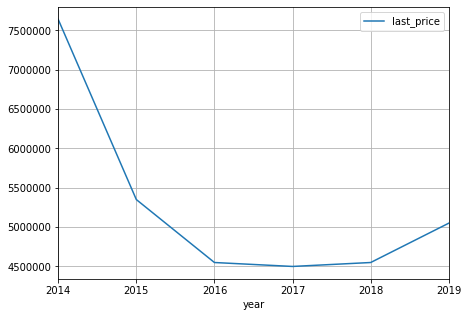

In [218]:
df.pivot_table(index= 'year', values ='last_price', aggfunc='median').plot(figsize=(7, 5), grid=True)
plt.show()

Цены на квартиры в 2014 г. были значительно выше, чем в последующие годы. Сильный спад цен пришелся на 2018г. В 2019 цены опять начали расти.


Аналогично посмотрим влияет ли месяц на колебание цены:

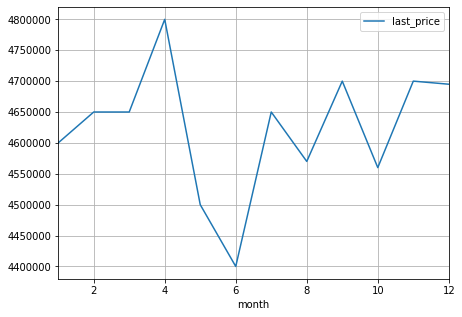

In [219]:
df.pivot_table(index= 'month', values ='last_price', aggfunc='median').plot(figsize=(7, 5), grid=True)
plt.show()

Пик стоимости продаж приходится на апрель, а спад на июнь. Все остальные месяцы характеризуются спадами и падениями примерно в одном диапазоне.

И последне, что посмотрим влияние дня недели на цену.

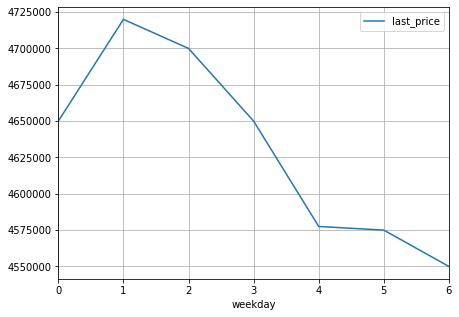

In [220]:
df.pivot_table(index= 'weekday', values ='last_price', aggfunc='median').plot(figsize=(7, 5), grid=True)
plt.show()

Во вторник цены выше, а в воскресенье цены самые низкие.

Дополнительно посчитаем коэффициент корреляции цены от значения года, месяца и дня недели.

In [221]:
df['last_price'].corr(df['year'])

    

-0.04292705107683146

In [222]:
df['last_price'].corr(df['month'])

0.002741029419924221

In [223]:
df['last_price'].corr(df['weekday'])

0.0016068614793023986

Коэффициенты очень низкие, возможно связь очень слабая, а возможно есть какие-то дополнительные факторы. 

### Определение 10 населенных пунктов с наибольшим количеством объявлений

Необходимо найти 10 населенных пунктов с наибольшим количеством объявлений.

In [224]:
locality_name_group = df.groupby('locality_name').agg({'locality_name': 'count'}) # сгруппируем данные по столбцу и посчитаем количество занчений в каждой группе
locality_name_group.columns = ['count'] # переименуем заголовок столбца
locality_name_group = locality_name_group.sort_values(by='count', ascending=False) # отсортируем список по убыванию
display(locality_name_group.head(10)) 


,count
locality_name,
Санкт-Петербург,15721
поселок Мурино,590
поселок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
поселок Парголово,327
Гатчина,307
деревня Кудрово,299


In [225]:
locality_name_top = locality_name_group[0:10] # занесем первые 10 пунктов в переменную


Сделаем срез методом query() по данным из внешней переменной. Для этого проверим вхождение в индекс.

In [226]:
locality_name_top_list =df.query('locality_name in @locality_name_top.index') #проверяем есть ли значение среди индексов серии

Далее построим сводную таблицу в которой, по каждому из наших 10 выбранных населенных пунктов посчитаем сумму цеи сумму площадей. Далее на основании этих данных расчитаем, среднюю цену квадратного метра в каждом их населенных пунктов.

In [227]:
locality_name_top_price_mean = locality_name_top_list.groupby('locality_name').agg({'last_price': ['sum'], 'total_area': ['sum']}) #создаем сводную таблицу
locality_name_top_price_mean.columns = ['sum_price','sum_area'] # переименовываем названия столбцов

locality_name_top_price_mean['price_mean'] = round(locality_name_top_price_mean['sum_price'] / locality_name_top_price_mean['sum_area']) #считаем среднюю стоимость кв. м и округляем значение до целого
display(locality_name_top_price_mean.sort_values(by ='price_mean', ascending =False))


,sum_price,sum_area,price_mean
locality_name,,,
Санкт-Петербург,1.267507e+11,1017958.15,124515.0
Пушкин,2.387074e+09,22712.98,105097.0
деревня Кудрово,1.266013e+09,13924.95,90917.0
поселок Парголово,1.467600e+09,16847.50,87111.0
поселок Мурино,2.170293e+09,26018.37,83414.0
поселок Шушары,1.807556e+09,23681.36,76328.0
Колпино,1.339839e+09,17992.24,74468.0
Гатчина,1.070919e+09,15639.48,68475.0
Всеволожск,1.508049e+09,22296.83,67635.0


Самая высокая стоимость жилья в Санкт-Петербургу, а самая из Топ-10 - это в Выборгу (почти в половину ниже чем в Питере).Второй по стоимости после Санкт-Петербурга- это Пушкин.

### Изучение предложения квартир в Санкт-Петербурге

Изучим предложение квартир в Санкт-Петербурге. 

Для начала выделим список квартир, которые относятся к СПб.

In [228]:
apartmens_spb = df.query('locality_name == "Санкт-Петербург"') #делаем срез по заданному условию


В данных есть небольшое количество пропусков, поэтому лучше мы их удалим.

In [229]:
apartmens_spb = apartmens_spb.dropna(subset=['cityCenters_nearest']) #удаление строк с пропусками в столбце расстояние до центра


Переведем расстояние в метрах в расстояние в километрах, а значения округлим до целого значения.

In [230]:
import warnings
warnings.simplefilter("ignore")
apartmens_spb['center_nearest_km'] = round(apartmens_spb['cityCenters_nearest'] / 1000)

Посчитаем корреляцию расстояния в км и стоимости квартир.

In [231]:
apartmens_spb['center_nearest_km'].corr(apartmens_spb['last_price'])

-0.2593987607930819

Коэффициент отрицательный, т.е. при увеличении расстояния от центра, стоимости снижается. При этом величина коэффициента не большая, что говорит, о том, что связь не очень сильная.

Построим график зависимости цены от удаленности от центра. Для этого сгруппируем данные по показателю расстояния и посчитаем среднюю цену для каждой группы.

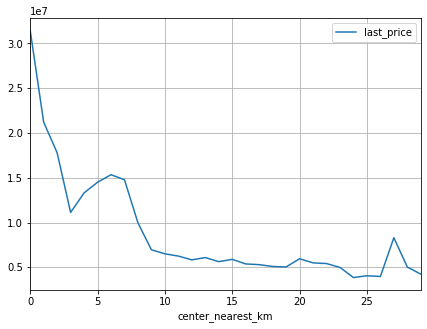

In [232]:
apartmens_spb.pivot_table(index= 'center_nearest_km', values ='last_price', aggfunc='mean').plot(figsize=(7, 5), grid=True)
plt.show()

На графике видно резкое изменение в районе 3 км от центра, но затем подьем и резкое снижение в районе 7 км. Будем считать эту отметку границей центральной зоны.

### Анализ квартир в центре

Выделим отдельно центральную зону и посмотрим, отличаются ли показатели от тех, которые мы расчитавали в начале анализа по всей выборке.

In [233]:
central_segment = apartmens_spb.query('center_nearest_km < 7') # срез данных по заданному условию

Построим гистограмму по распределению площади:

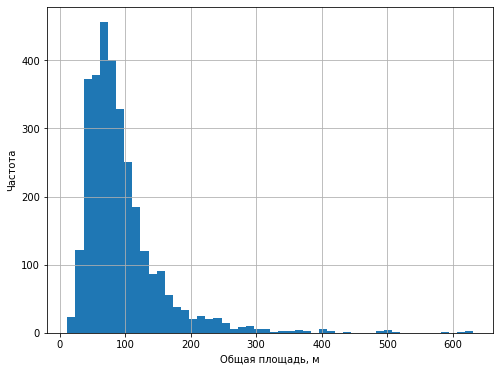

In [234]:
central_segment['total_area'].hist(bins=50, figsize=(8, 6))
plt.xlabel('Общая площадь, м')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир в заданой области имеет площадь в районе 70 кв.м. В то время, как в первоначальной выборки основная масса была площадью 50 кв.м. После 150 кв.м количество встречаемости квартир с большей площадью уменьшается. 

Гистрограмма по показателю цены:

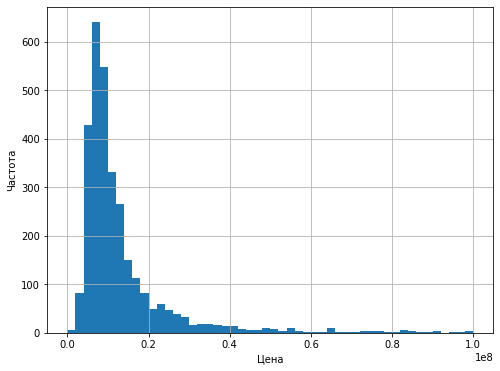

In [235]:
central_segment['last_price'].hist(bins=50, range=(0, 100000000), figsize=(8, 6))
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир с ценой в районе 10 миллионов. Картина похожа распределение в общей выборке.

Гистограмма по количеству комнат

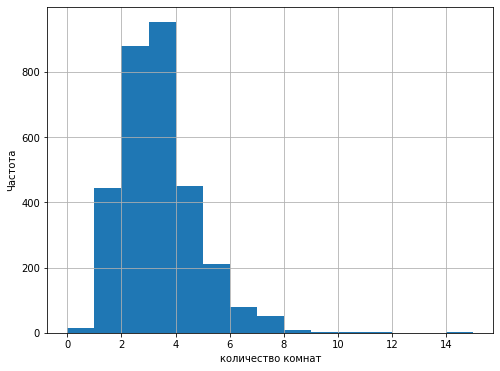

In [236]:
central_segment['rooms'].hist(bins=15, range=(0,15), figsize=(8, 6))
plt.xlabel('количество комнат')
plt.ylabel('Частота')
plt.show()

А вот здесь отличие от данных в общей выборке. Однокомнатных квартир не очень много. Больше всего четырехкомнатных и чуть меньше трехкомнатных, тогда как в общей выборке основными были одно- и двухкомнатные квартиры. При большем количестве комнат гистограммы достаточно похожи.

Гистограмма по высоте потолков:

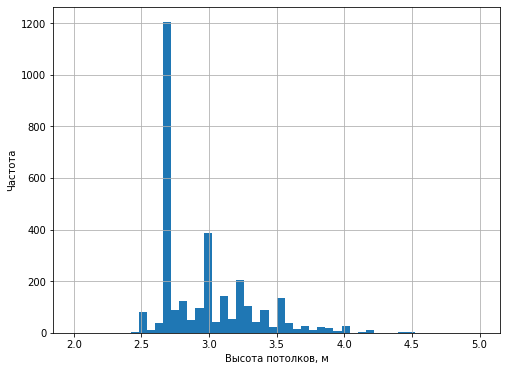

In [237]:
central_segment['ceiling_height'].hist(bins=50, range=(2, 5), figsize=(8, 6))
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

Больше всего квартир с потолками 2,7 м, хотя достаточное количество 3, 3,2 и 3,5 м, что скорее всего объясняется, тем, что в центре большинство домов старых, еще дореволюционной постройки, где были высокие потолки. В общей выборке смещение было в сторону высоты 2,5-2,7 м.- т.к туда попадает много квартир эконом-класса с невысокими потолками.

Посмотрим взаимосвязь цены и общей площади, посчитав коэффициент корреляции и построив диаграмму рассеивания, как мы это уже делали ранее

In [238]:
central_segment['last_price'].corr(df['total_area'])

0.6046693648979125

Коэффициент корреляции немного ниже, чем посчитанный по общей выборке. Для центра города - это нормально, потому престижность жилья, может влиять сильнее, желание жить в более большой квартире.

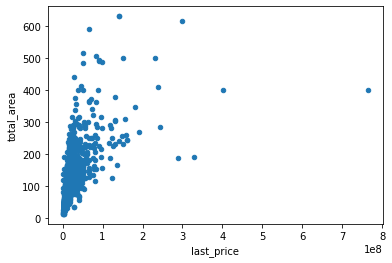

In [239]:
central_segment.plot(x='last_price', y= 'total_area', kind = 'scatter') 
plt.show()

Рисунок на диаграмме рассеивания, очень похож на общую тенденцию полученную в общей выборке.

Взаимосвязь цены и количества комнат:

In [240]:
central_segment['last_price'].corr(df['rooms'])

0.3039709156688261

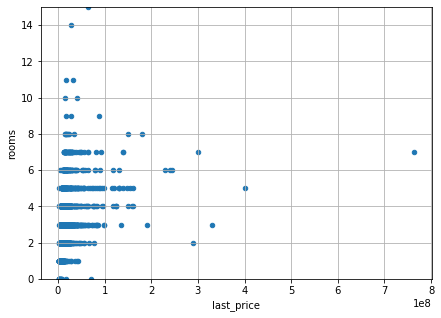

In [241]:
central_segment.plot(x='last_price', y= 'rooms', kind = 'scatter', ylim=(0, 15), figsize=(7, 5), grid=True) 
plt.show()

Здесь сюрпризов нет. Коэффициент корреляции также не высок, что говорит о слабой связи этих показателей, а рисунок на диаграмме очень похож, на тот , который был получен по общей выборке.

Посмотрим взаимосвязь этажа и стоимости квартиры

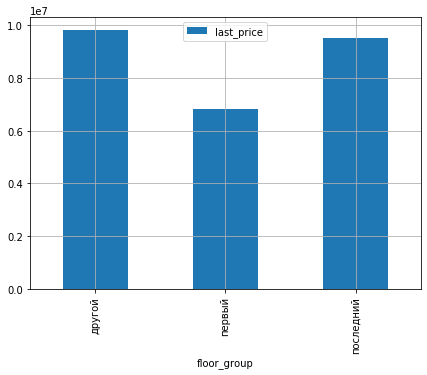

In [242]:
central_segment.pivot_table(index= 'floor_group', values ='last_price', aggfunc='median').plot(kind='bar', figsize=(7, 5), grid=True)
plt.show()

Здесь тоже нет неожиданностей. Картина похода на то, что мы уже видели по общей выборке. 

Взаимосвязь удаленности от центра и цены:

In [243]:
central_segment['last_price'].corr(df['cityCenters_nearest'])

-0.05043937954089692

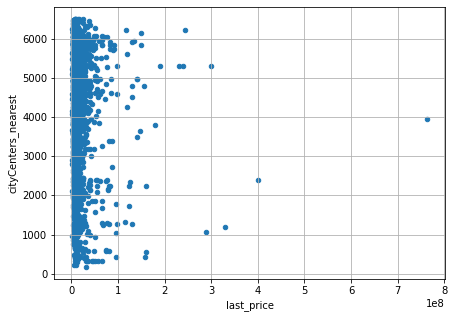

In [244]:
central_segment.plot(x='last_price', y= 'cityCenters_nearest', kind = 'scatter', figsize=(7, 5), grid=True)
plt.show()

Поскольку сейчас мы рассматриваем центральную зону, то данные внутри должны быть достаточно однородны или с плавными переходами. Эта зона достаточно не большая, то и связь цены и удаленности от центра маленькая.

Взаимосвязь даты размещения объявления и цены:

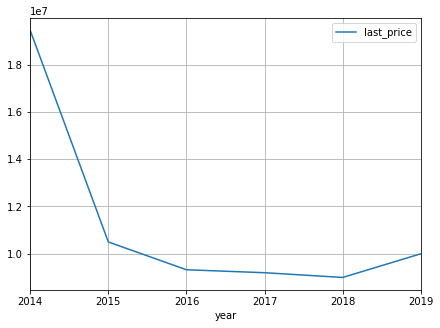

In [245]:
central_segment.pivot_table(index= 'year', values ='last_price', aggfunc='median').plot(figsize=(7, 5), grid=True)
plt.show()

In [246]:
central_segment['last_price'].corr(df['year']) # коэффициент корреляции для центрального сегмента

-0.03230552138621508

Взаимосвязь даты размещения объявления и цены по центральной зоне и по всей выборке очень похожи, хотя коэффициент корреляции по всей выборке чуть больше, но все равно очень низкий.

**Вывод**

Данные по центральной зоне во многом похожи на данные полученные по общей выборке. Наиболее часто встречающаяся площадь, немного больше, чем та, которая чаще встречается в общей выборке. Высота потолков, тоже несколько отличается - наиболее встречающиеся показатели выше, чем по общей выборке. В центральной зоне встречаются чаще картиры с 3-4 комнатами, тогда как в общей выборке наиболее часто встречаются квартирвы с 1-2 комнатами. Взаимосвязь таких параметров как число комнат и цены, даты размещения и цены достаточно похожа на взаимосвязь этих же параметров по общей выборке.

## Общий вывод

В данной работе мы получив данные о полученном файле, провели его предобработку: заменили пропущенные значения, где это уместно, преобразовали тип данных и удалили дубликаты.

Далее мы добавили несколько дополнительных столбцов в таблицу, которые нужны ним были для проведегия анализа.

В основной части проекта мы провели анализ данных по данным полученным от сервиса Яндекс.Недвижимость. Целью проекта было посмотреть, как распределяется количество объявления в зависимости от параметров площади, цены, числа комнат и высоты потолков. А также, нашей целью, было посмотреть есть ли взаимосвязь между ценой и рядом показателей по общей выборке и на примере центральной зоны Санкт-Петербурга. Наш анализ показал, что например число комнат не особенно влияют на цену. Значительно в большей степени на цену влияет площадь квартиры и этаж. Удаленность от центра влияет на цену в общей выборке, а в пределах центральной зону этой связи практически нет. 
Сделали анализ и определили, какой период продажи картиры считается нормальным, отбросив слишком медленные и слишком быстрые продажи. Этот период у нас оказался в диапазоне от 30 до 578 дней.
Выбрали 10 населенных пунктов, в которых было наибольшее количество объявлений и посчитали среднюю стоимость квадратного метра по ним. Получилось, что самый дорогой кв.м в Санкт-Петербурге, а самый дешевый из выбранных 10 населеных пунктов в Выборге, там стоимость отличается от лидера десятки в два раза.